# Sinusoid forecasting

## The imports

In [1]:
%matplotlib inline
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
from apiclass import *
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from sklearn.metrics import mean_squared_error as mse
from pylab import rcParams
from scipy.fftpack import fft

In [2]:
import sys
import warnings
import pickle
from math import *
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Body

In [4]:
# Данный блок используется для загрузки pandas dataframe
#
'''
### Dataframe extraction
query_body = """
SELECT  value

FROM meas
"""
########The database to retrieve data from ML######################
zhost = '192.168.4.33'
zport = 8086
zuser = ''
zpassword = ''
zdb_name = 'db'

#starttime = time.time()
#writer_client = DataFrameClient(host=zhost, port=zport, username=zuser, password=zpassword, database=db_name)
predictor = Online_predictor(zhost, zport, zuser, zpassword, zdb_name,query_body)
predictor.get_data_from_influx()
predictor.read_data()
df = predictor.prepare_data()
#print(df.ngp)
'''

'\n### Dataframe extraction\nquery_body = """\nSELECT  value\n\nFROM meas\n"""\n########The database to retrieve data from ML######################\nzhost = \'192.168.4.33\'\nzport = 8086\nzuser = \'\'\nzpassword = \'\'\nzdb_name = \'db\'\n\n#starttime = time.time()\n#writer_client = DataFrameClient(host=zhost, port=zport, username=zuser, password=zpassword, database=db_name)\npredictor = Online_predictor(zhost, zport, zuser, zpassword, zdb_name,query_body)\npredictor.get_data_from_influx()\npredictor.read_data()\ndf = predictor.prepare_data()\n#print(df.ngp)\n'

                     Thread-Gen-1.mean_sinusoid
date                                           
2018-11-07 09:12:00                  -98.000000
2018-11-07 09:12:10                  -95.800000
2018-11-07 09:12:20                  -89.700000
2018-11-07 09:12:30                  -80.500000
2018-11-07 09:12:40                  -70.111111
Thread-Gen-1.mean_sinusoid    float64
dtype: object


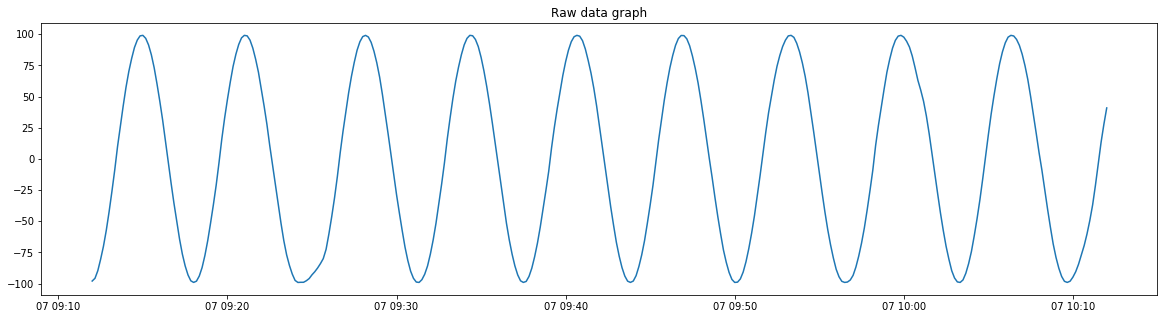

In [19]:
df = pd.read_csv("db1.autogen.Thread-Gen-1.2018-11-07-10-12.csv",parse_dates=["date"],infer_datetime_format=True) # Считываем заранее скачанный .csv file
df["date"]=pd.to_datetime(df["date"],infer_datetime_format=True)
df.set_index('date', inplace=True)
print(df.head())
#df = df["Thread-Gen-1.mean_sinusoid"]
rcParams['figure.figsize'] = 20,5
plt.plot(df["Thread-Gen-1.mean_sinusoid"])
plt.title("Raw data graph")
print(df.dtypes)

In [23]:
### Использование функции описано в скрипте
def serialize(param_data, filename,train_idx=slice(97000,100000),test_idx=slice(100000,103000), seasonal_periods=314):
    train, test = param_data.iloc[train_idx], param_data.iloc[test_idx]
    param_data.index.freq = '10S'
    model = ExponentialSmoothing(train,seasonal='add',seasonal_periods=seasonal_periods).fit()
    pred = model.predict(start=test.index[0], end=test.index[-1])
    with open('%s.pickle' %filename, 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    plt.rcParams["figure.figsize"] = 20,5
    ####plt.plot(train.index, train, label='Train')
    plt.plot(param_data.iloc[test_idx], label='Test')
    plt.plot(pred, label='Holt-Winters')
    plt.legend(loc='best')
    plt.show()
    print(mse(pred,param_data.iloc[test.index[0]-1:test.index[-1]]))
    #return mse(pred,param_data.iloc[test.index[0]-1:test.index[-1]])

In [13]:
### This function loads the model, makes a prediction and plots it.
def performance(param_data, filename, test_idx):
    with open('%s.pickle'%filename, 'rb') as handle:
        model1 = pickle.load(handle)
        pred = model1.predict(start=param_data.iloc[test_idx].index[0], end=param_data.iloc[test_idx].index[-1])#param_data.index[-1])
    plt.rcParams["figure.figsize"] = 20,5
    #plt.plot(train.index, train, label='Train')
    plt.plot(param_data.iloc[test_idx], label='Test')
    plt.plot(pred, label='Holt-Winters')
    plt.legend(loc='best')
    plt.show()
    print(mse(pred,param_data.iloc[param_data.iloc[test_idx].index[0]-1:param_data.iloc[test_idx].index[-1]]))

In [116]:
a = list()
for i in range(50,200):
    for j in range(30,45):
        train_idx=slice(0,i)
        test_idx=slice(i,350)
        mse_ret = serialize(df ,'model_saved',train_idx,test_idx,seasonal_periods=j)
        a.append([mse_ret,i,j])
    print(i)
#print(min(a),values.index(min(values))
#performance(df,'model_saved',test_idx)
#plt.plot(a)


50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [118]:
b = np.array(a)
print(b[:,0].min(axis=0),np.argmin(b[:,0]))

529.5825862346289 984


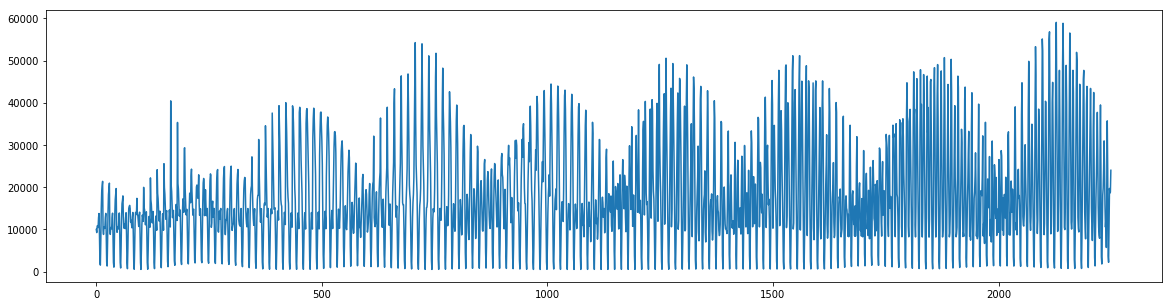

In [119]:
plt.plot(b[:,0])

In [121]:
b[984]


array([529.58258623, 115.        ,  39.        ])

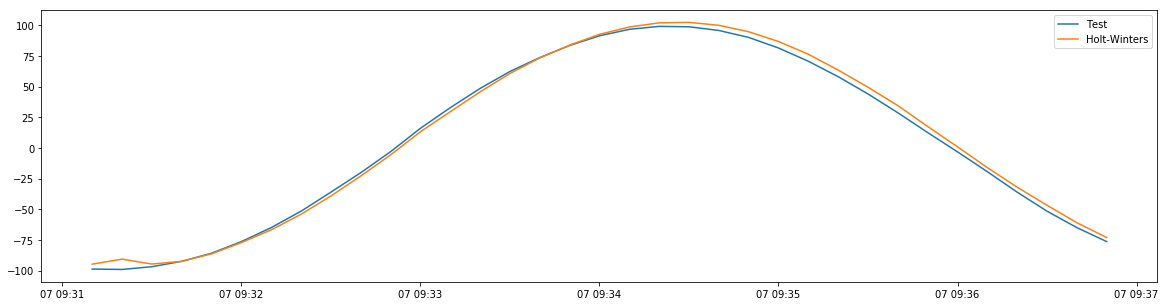

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2018-11-07 09:31:00] of <class 'pandas._libs.tslibs.timestamps.Timestamp'>

In [26]:
i =115
train_idx=slice(0,i)
test_idx=slice(i,150)
serialize(df ,'model_saved',train_idx,test_idx,seasonal_periods=39)

In [8]:
a = df.values
a.shape

(361,)